# PyCaret: Porto Seguro (Classification)

Based on: https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

In [1]:
time_limit = 60  # 1 hour max (confirm with timer)
metric = "AUC"  # specify your evaluation metric
label = "target" # name of target or label variable (just happens to be called "target" for this dataset)

## Import

In [2]:
# Import packages

from pycaret.classification import *

import numpy as np
import pandas as pd
import pycaret

In [3]:
# Import data

train_data = pd.read_csv("porto_train.csv")
test_data = pd.read_csv("porto_test.csv")

In [4]:
train_data.shape

(476170, 60)

In [5]:
test_data.shape

(119042, 59)

## Tidy

In [6]:
# Replace "-1" with missing value
train_data = train_data.replace(-1, np.nan)
test_data = test_data.replace(-1, np.nan)

## Transform

In [7]:
# Drop variable not used as predictors
train_data = train_data.drop(["id", "fold"], axis=1)
test_data = test_data.drop(["id"], axis=1)

In [8]:
# Convert categorical variables to "category" data type
cat_vars = [col for col in train_data.columns if 'cat' in col]
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [9]:
for col in cat_vars:
    test_data[col] = test_data[col].astype('category')

# TypeError: 'Categorical' with dtype category does not support reduction 'mean'
# cat_vars = cat_vars + ["target"]

for col in cat_vars:
    train_data[col] = train_data[col].astype('category')

In [10]:
# Create separate test data to demonstrate how to make predictions on new examples at inference time:
# y_test = test_data[label]  # values to predict

## Visualize

(skipped)

## Model

In [11]:
%%time

s = setup(train_data, target=label, session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(476170, 58)"
4,Transformed data shape,"(476170, 110)"
5,Transformed train set shape,"(333319, 110)"
6,Transformed test set shape,"(142851, 110)"
7,Ordinal features,6
8,Numeric features,43
9,Categorical features,14


CPU times: user 4.68 s, sys: 1.72 s, total: 6.4 s
Wall time: 14.5 s


In [12]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
%%time

# compare baseline models
best = compare_models(sort=metric, budget_time=time_limit)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,21.6620
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,3.1880
ada,Ada Boost Classifier,0.9635,0.6310,0.0000,0.0000,0.0000,0.0000,0.0000,8.6610
lr,Logistic Regression,0.9635,0.6260,0.0000,0.0000,0.0000,0.0000,0.0000,14.3620
lda,Linear Discriminant Analysis,0.9635,0.6256,0.0000,0.0000,0.0000,-0.0000,-0.0002,3.7220
catboost,CatBoost Classifier,0.9635,0.6196,0.0002,0.1250,0.0005,0.0004,0.0045,8.9270
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,20.3390
nb,Naive Bayes,0.8508,0.6021,0.2118,0.0602,0.0938,0.0392,0.0486,1.4930
rf,Random Forest Classifier,0.9635,0.5862,0.0000,0.0000,0.0000,0.0000,0.0000,4.9630
qda,Quadratic Discriminant Analysis,0.8132,0.5849,0.2395,0.0558,0.0857,0.0309,0.0402,3.5210


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

CPU times: user 3min 20s, sys: 16.9 s, total: 3min 37s
Wall time: 24min 52s


In [14]:
# predict model on new_data
predictions = predict_model(best, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9636,0.6328,0.0000,0.0000,0.0000,-0.0000,-0.0006


### AutoML

This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [15]:
%%time

automl(optimize=metric)

CPU times: user 5.57 s, sys: 2.11 s, total: 7.67 s
Wall time: 7.7 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Communicate

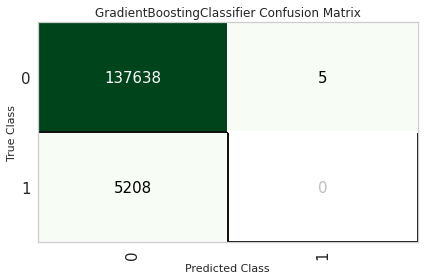

In [16]:
# plot confusion matrix
plot_model(best, plot='confusion_matrix')

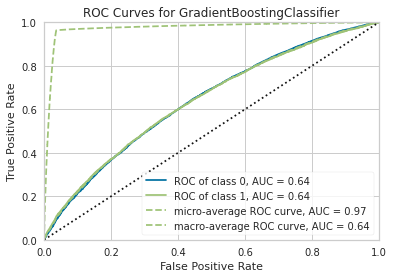

In [17]:
# plot AUC
plot_model(best, plot='auc')

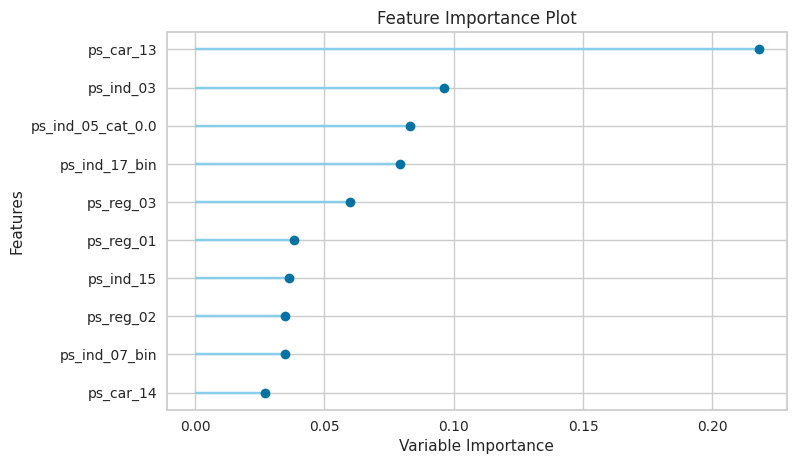

In [18]:
# plot feature importance
plot_model(best, plot='feature')

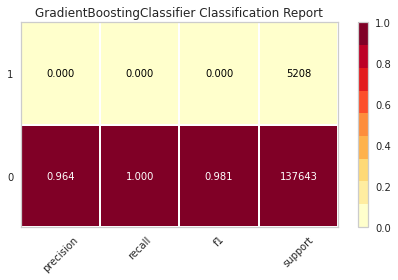

In [19]:
# plot class report
plot_model(best, plot='class_report')